# Analyzing email spam data with a Bernoulli model
a notebook for the book [Bayesian Learning](https://github.com/mattiasvillani/BayesianLearningBook/raw/main/pdf/BayesBook.pdf) by [Mattias Villani](http://mattiasvillani.com)

### Problem
The SpamBase dataset from the [UCI repository](https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data) consists of $n=4601$ emails that 
have been manually classified as *spam* (junk email) or *ham* (non-junk email). \
The dataset also 
contains a vector of covariates/features for each email, such as the number of capital letters or \$-signs; this information can be used to build a spam filter that automatically separates spam from ham.\
This notebook analyzes only the proportion of spam emails without using the covariates.

### Getting started

First, load libraries and setting up colors.

In [1]:
options(repr.plot.width=16, repr.plot.height=5, lwd = 4)
library("RColorBrewer") # for pretty colors
library("tidyverse")    # for string interpolation to print variables in plots.
library("latex2exp")    # the TeX() function makes it possible to print latex math
colors = brewer.pal(12, "Paired")[c(1,2,7,8,3,4,5,6,9,10)];

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Data

In [2]:
data = read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", sep=",", header = TRUE)
spam = data$X1 # This is the binary data where spam = 1, ham = 0.
n = length(spam)
spam = sample(spam, size = n) # Randomly shuffle the data.

### Model, Prior and Posterior

**Model**
$$ X_1,\ldots,X_n | \theta \sim \mathrm{Bern}(\theta)$$

**Prior**
$$\theta\sim\mathrm{Beta}(\alpha,\beta)$$

**Posterior**
$$\theta | x_1,\ldots,x_n \sim\mathrm{Beta}(\alpha+s,\beta+f),$$

where $s=\sum_{i=1}^n x_i$ is the number of 'successes' (spam) and $f=n-s$ is the number of 'failures' (ham).

Let us define a function that computes the posterior and plots it.

In [3]:
BernPost <- function(x, alphaPrior, betaPrior, legend = TRUE){
    thetaGrid = seq(0,1, length = 1000)
    n = length(x)
    s = sum(x)
    f = n - s
    alphaPost = alphaPrior + s
    betaPost = betaPrior + f
    priorPDF = dbeta(thetaGrid, alphaPrior, betaPrior)
    normLikePDF = dbeta(thetaGrid, s + 1, f + 1) # Trick to get the normalized likelihood
    postPDF = dbeta(thetaGrid, alphaPost, betaPost)
    
    plot(1, type="n", axes=FALSE, xlab = expression(theta), ylab = "", 
         xlim=c(min(thetaGrid),max(thetaGrid)), 
         ylim = c(0,max(priorPDF,postPDF,normLikePDF)), 
         main = TeX(sprintf("Prior: $\\mathrm{Beta}(\\alpha = %0.0f, \\beta = %0.0f)", alphaPrior, betaPrior)))
    axis(side = 1)
    lines(thetaGrid, priorPDF, type = "l", lwd = 4, col = colors[6])
    lines(thetaGrid, normLikePDF, lwd = 4, col = colors[2])
    lines(thetaGrid, postPDF, lwd = 4, col = colors[4])
    if (legend){
        legend(x = "topleft", inset=.05,
           legend = c("Prior", "Likelihood (normalized)", "Posterior"),  
           lty = c(1, 1, 1), pt.lwd = c(3, 3, 3), 
           col = c(colors[6], colors[2], colors[4]))
    }
    cat("Posterior mean is ", round(alphaPost/(alphaPost + betaPost),3), "\n")
    cat("Posterior standard deviation is ", round(sqrt(  alphaPost*betaPost/( (alphaPost+betaPost)^2*(alphaPost+betaPost+1))),3), "\n")
    return(list("alphaPost" = alphaPrior + s, "betaPost" = betaPrior + f))
}

Let's start by analyzing only the first 10 data points.

Posterior mean is  0.375 
Posterior standard deviation is  0.117 
Posterior mean is  0.5 
Posterior standard deviation is  0.109 
Posterior mean is  0.625 
Posterior standard deviation is  0.117 


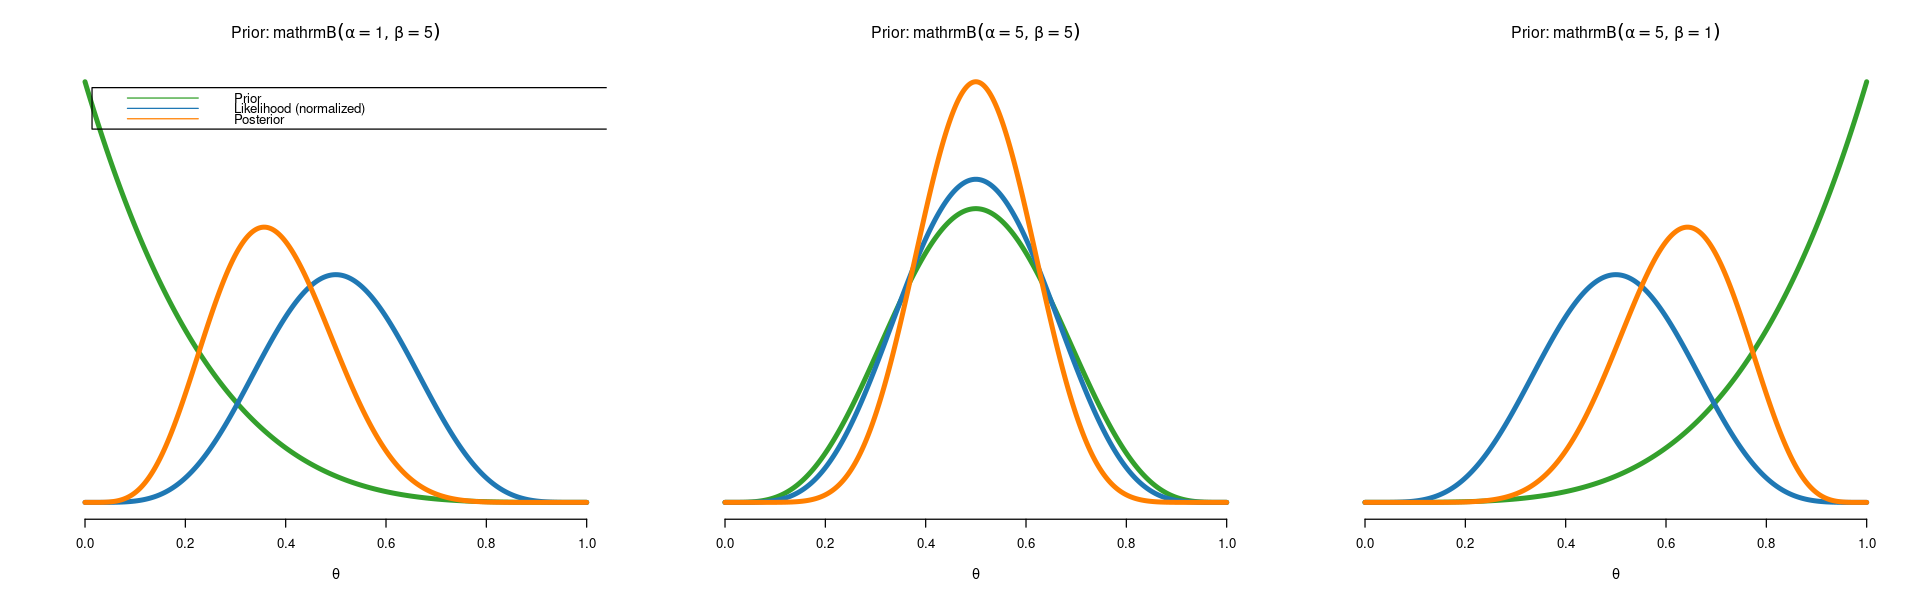

In [4]:
n = 10
x = spam[1:n]
par(mfrow = c(1,3))
post = BernPost(x, alphaPrior = 1, betaPrior = 5, legend = TRUE)
post = BernPost(x, alphaPrior = 5, betaPrior = 5, legend = FALSE)
post = BernPost(x, alphaPrior = 5, betaPrior = 1, legend = FALSE)

Since we only have $n=10$ data points, the posteriors for the three different priors differ a lot. Priors matter when the data are weak.
Let's try with the $n=100$ first observations.

Posterior mean is  0.387 
Posterior standard deviation is  0.047 
Posterior mean is  0.409 
Posterior standard deviation is  0.047 
Posterior mean is  0.425 
Posterior standard deviation is  0.048 


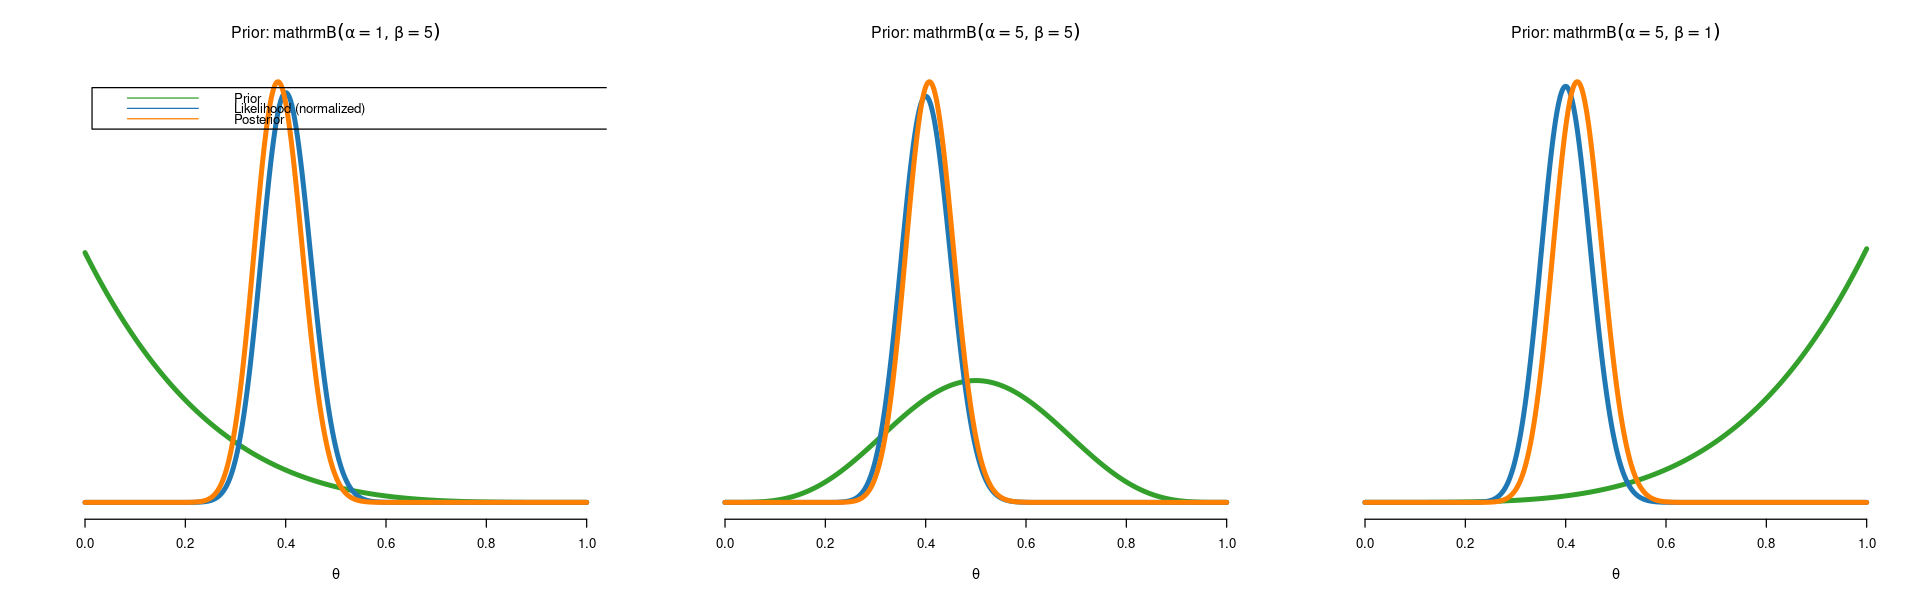

In [5]:
n = 100
x = spam[1:n]
par(mfrow = c(1,3))
post = BernPost(x, alphaPrior = 1, betaPrior = 5, legend = TRUE)
post = BernPost(x, alphaPrior = 5, betaPrior = 5, legend = FALSE)
post = BernPost(x, alphaPrior = 5, betaPrior = 1, legend = FALSE)

The effect of the prior is now almost gone. Finally let's use all $n=4601$ observations in the dataset:

Posterior mean is  0.394 
Posterior standard deviation is  0.007 
Posterior mean is  0.394 
Posterior standard deviation is  0.007 
Posterior mean is  0.394 
Posterior standard deviation is  0.007 


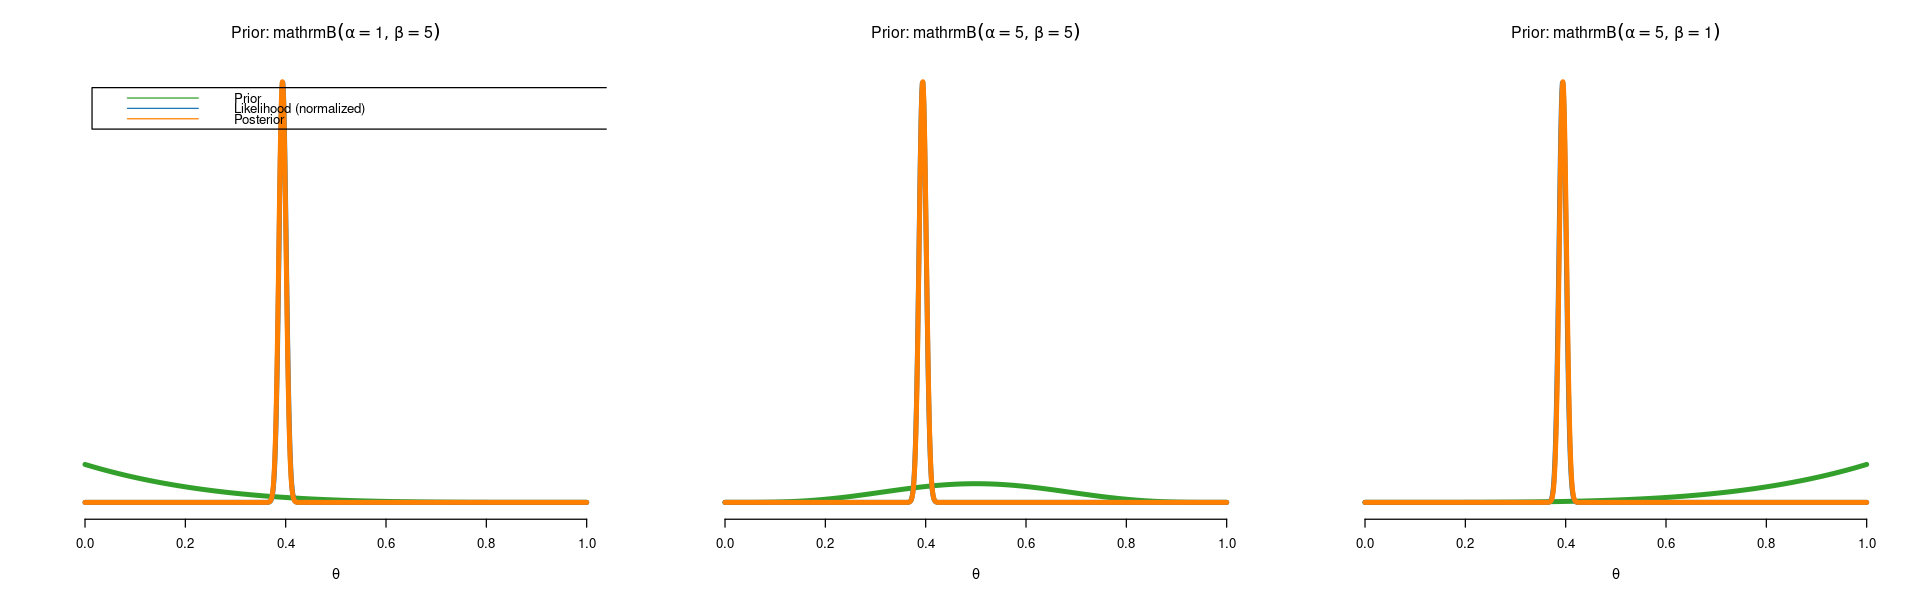

In [6]:
x = spam
par(mfrow = c(1,3))
post = BernPost(x, alphaPrior = 1, betaPrior = 5, legend = TRUE)
post = BernPost(x, alphaPrior = 5, betaPrior = 5, legend = FALSE)
post = BernPost(x, alphaPrior = 5, betaPrior = 1, legend = FALSE)

We see two things:
* The effect of the prior is completely gone. All three prior give identical posteriors. We have reached a subjective consensus among the three persons.
* We are quite sure now that the spam probability $\theta$ is around $0.4$.

A later notebook will re-analyze this data using for example logistic regression.